# Visualising ICON GRIB data using ECMWF eccodes python binding / cfgrib

Advantage: uses eccodes definitions

## dacepy

- library developped at DWD (Gernot Geppert)
- R&D software
- based on ECMWF eccodes Python 3 binding

#### Setup

Before working with dacepy (before loading this notebook) make sure
- all needed modules are loaded (set_environment.txt), especially `eccodes` and `eccodes_cosmo_resources` which provide the eccodes library and set the environment variables `GRIB_SAMPLES_PATH` and `GRIB_DEFINITION_PATH`
- the conda environment is activated
- additionally, set the environment variable `DACEPY_ICONGRIDDIR` to point to the location of the ICON grid file

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import dacepy

import matplotlib.pyplot as plt

/scratch/cmerker/miniconda3/envs/dacepy/lib/python3.9/site-packages/pyresample/bilinear/__init__.py:50: UserWarning: XArray and/or zarr not found, XArrayBilinearResampler won't be available.
  warnings.warn("XArray and/or zarr not found, XArrayBilinearResampler won't be available.")


In [3]:
f_icon_irr = '/scratch/walser/icon-vis/icon-1/21112300.grb2/lfff00000000'
f_icon_reg = '/store/s83/tsm/ICON-1E/FCST21/21112300_606/grib/i1effsurf000_001'
f_cosmo = '/store/s83/osm/KENDA-1/ANA21/det/laf2021112300'

#### Plot ICON 2D fields on the triangular grid

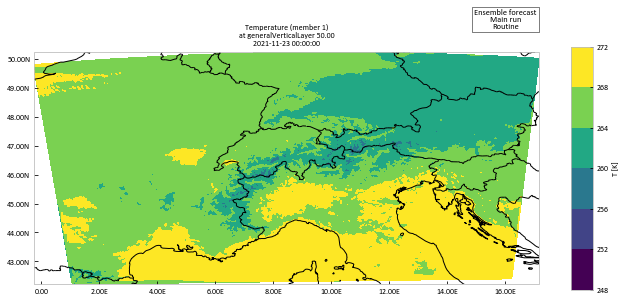

In [4]:
fig = dacepy.contourf(f_icon_irr, 'T', 50)

plt.gcf().set_size_inches(10, 5)

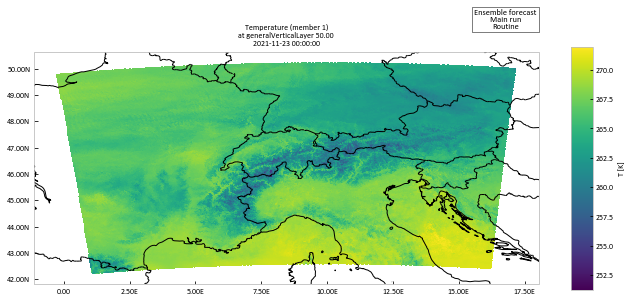

In [5]:
fig = dacepy.pcolor(f_icon_irr, 'T', 50)

plt.gcf().set_size_inches(10, 5)

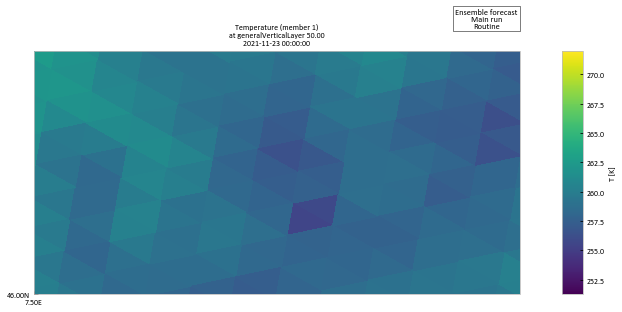

In [6]:
fig = dacepy.pcolor(f_icon_irr, 'T', 50)

plt.gcf().get_axes()[0].set_xlim(7.5,7.7)
plt.gcf().get_axes()[0].set_ylim(46,46.1)

plt.gcf().set_size_inches(10, 5)

#### read in wind

In [8]:
var_u = dacepy.read_variable(f_icon_irr, 'U', 78)
var_u

<xarray.DataArray 'U-Component of Wind' (cells: 1028172)>
array([-4.27246094e-04, -4.27246094e-04, -4.27246094e-04, ...,
        1.37554932e+00,  1.42535400e+00,  1.34039307e+00])
Coordinates:
    longitude             (cells) float64 -0.2116 -0.2168 ... 14.94 14.94
    latitude              (cells) float64 49.48 49.47 49.46 ... 49.73 49.73
    generalVerticalLayer  float64 78.0
    ensemble              int64 1
    time                  datetime64[ns] 2021-11-23
Dimensions without coordinates: cells
Attributes:
    gridDefinitionTemplateNumber:  101
    numberOfGridUsed:              1
    name:                          U-Component of Wind
    shortName:                     U
    typeOfLevel:                   generalVerticalLayer
    units:                         m s-1
    typeOfGeneratingProcess:       Ensemble forecast
    backgroundProcess:             Main run
    dataDate:                      20211123
    dataTime:                      0
    localNumberOfExperiment:       Rout

#### plot a  variable without clear model level assignment

In [10]:
var_clcl = dacepy.read_variable(f_icon_irr, 'CLCL', '*')
var_clcl

<xarray.DataArray 'Cloud Cover (800 hPa - Soil)' (cells: 1028172)>
array([ 0.        ,  0.        ,  0.        , ..., 99.98632812,
       99.90820312, 99.87695312])
Coordinates:
    longitude      (cells) float64 -0.2116 -0.2168 -0.2167 ... 14.94 14.94 14.94
    latitude       (cells) float64 49.48 49.47 49.46 49.47 ... 49.74 49.73 49.73
    isobaricLayer  float64 800.0
    ensemble       int64 1
    time           datetime64[ns] 2021-11-23
Dimensions without coordinates: cells
Attributes:
    gridDefinitionTemplateNumber:  101
    numberOfGridUsed:              1
    name:                          Cloud Cover (800 hPa - Soil)
    shortName:                     CLCL
    typeOfLevel:                   isobaricLayer
    units:                         %
    typeOfGeneratingProcess:       Ensemble forecast
    backgroundProcess:             Main run
    dataDate:                      20211123
    dataTime:                      0
    localNumberOfExperiment:       Routine

<dacepy.grids.Ico

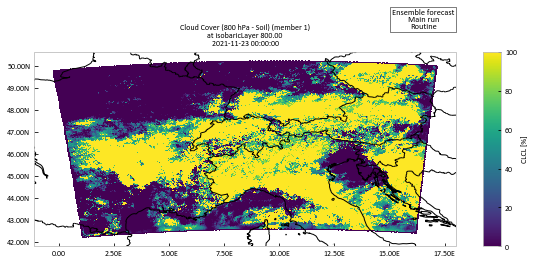

In [12]:
var_clcl.pcolor()

#### Plot ICON 2D fields on an interpolated, rectangular grid 

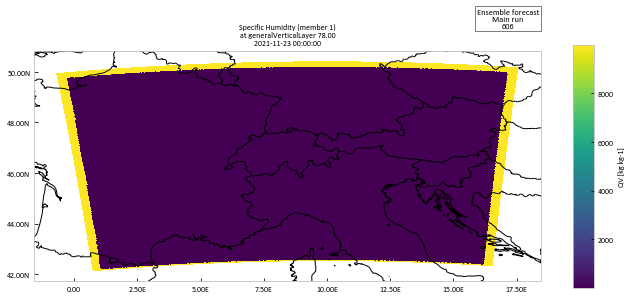

In [13]:
fig = dacepy.pcolor(f_icon_reg, 'QV', 78)

plt.gcf().set_size_inches(10, 5)

Look at the variable in more details. The variable object contains an xarray with the data (access with `var.array`) and a lot of meta data from the GRIB file (e.g. grid info)

In [14]:
var = dacepy.read_variable(f_icon_reg, 'QV', 78)
var

<xarray.DataArray 'Specific Humidity' (y: 786, x: 1170)>
array([[9999., 9999., 9999., ..., 9999., 9999., 9999.],
       [9999., 9999., 9999., ..., 9999., 9999., 9999.],
       [9999., 9999., 9999., ..., 9999., 9999., 9999.],
       ...,
       [9999., 9999., 9999., ..., 9999., 9999., 9999.],
       [9999., 9999., 9999., ..., 9999., 9999., 9999.],
       [9999., 9999., 9999., ..., 9999., 9999., 9999.]])
Coordinates:
    longitude             (y, x) float64 0.7593 0.7726 0.786 ... 17.52 17.54
    latitude              (y, x) float64 42.14 42.14 42.14 ... 50.16 50.16 50.16
    generalVerticalLayer  float64 78.0
    ensemble              int64 1
    time                  datetime64[ns] 2021-11-23
Dimensions without coordinates: y, x
Attributes: (12/19)
    gridDefinitionTemplateNumber:  1
    latitudeOfFirstGridPoint:      -4460000
    longitudeOfFirstGridPoint:     353140000
    latitudeOfLastGridPoint:       3390000
    longitudeOfLastGridPoint:      4830000
    iDirectionIncrement:     

Now remove the undefs

In [15]:
var = var.where(var != 9999.)

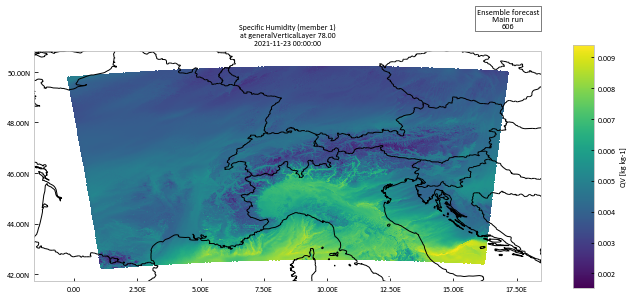

In [16]:
fig = var.pcolor()

plt.gcf().set_size_inches(10, 5)

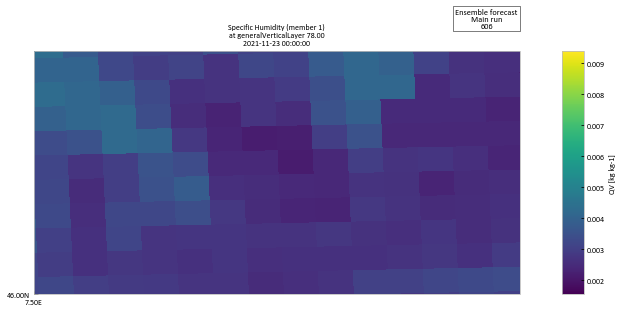

In [17]:
fig = var.pcolor()

plt.gcf().get_axes()[0].set_xlim(7.5,7.7)
plt.gcf().get_axes()[0].set_ylim(46,46.1)

plt.gcf().set_size_inches(10, 5)

#### Plot COSMO 2D fields on a rectangular grid

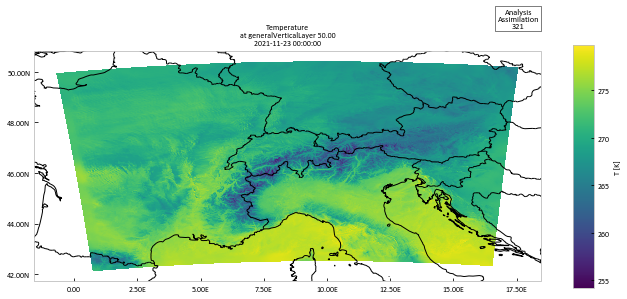

In [18]:
fig = dacepy.pcolor(f_cosmo, 'T', 50)

plt.gcf().set_size_inches(10, 5)

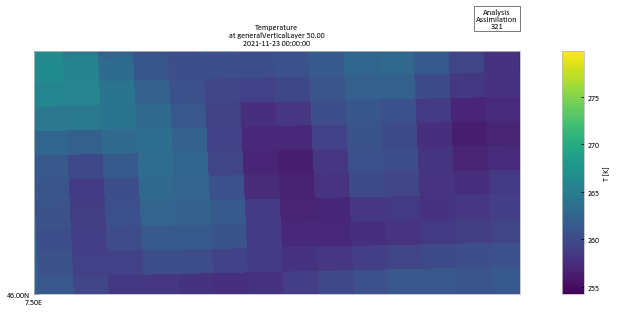

In [19]:
fig = dacepy.pcolor(f_cosmo, 'T', 50)

plt.gcf().get_axes()[0].set_xlim(7.5,7.7)
plt.gcf().get_axes()[0].set_ylim(46,46.1)

plt.gcf().set_size_inches(10, 5)

#### Regrid triangular ICON data to regular COSMO grid and visualise differences

In [20]:
var_icon = dacepy.read_variable(f_icon_irr, 'T', 50)
var_cosmo = dacepy.read_variable(f_cosmo, 'T', 50)

In [21]:
var_icon_remapped = var_icon.remap(var_cosmo)

/scratch/cmerker/miniconda3/envs/dacepy/lib/python3.9/site-packages/pyresample/kd_tree.py:384: UserWarning: Possible more than 8 neighbours within 100000 m for some data points
  warnings.warn(('Possible more than %s neighbours '


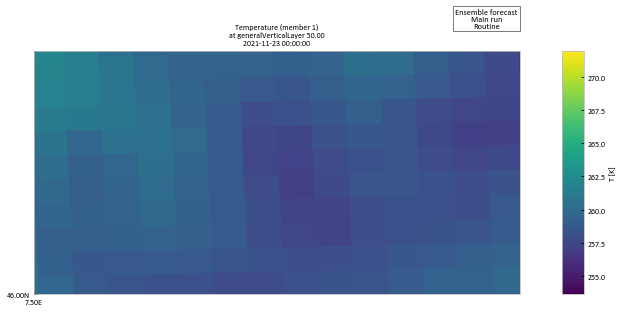

In [22]:
fig = var_icon_remapped.pcolor()

plt.gcf().get_axes()[0].set_xlim(7.5,7.7)
plt.gcf().get_axes()[0].set_ylim(46,46.1)

plt.gcf().set_size_inches(10, 5)

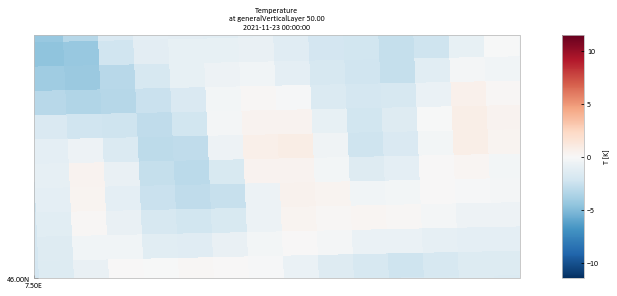

In [23]:
fig = (var_icon_remapped - var_cosmo).pcolor()

plt.gcf().get_axes()[0].set_xlim(7.5,7.7)
plt.gcf().get_axes()[0].set_ylim(46,46.1)

plt.gcf().set_size_inches(10, 5)

#### Plot ICON profiles

In [24]:
#dacepy.read_profile?
t_profile = dacepy.read_profile(f_icon_irr, 'T', 7.5, 44)

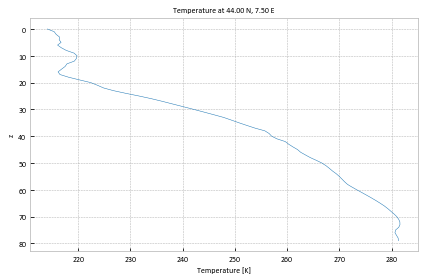

In [25]:
fig = t_profile.plot(y='z', yincrease=False)

#### Plot ICON cross-sections
functionality is there but does not work properly for me...

In [ ]:
var_icon_alllev = dacepy.read_variable(f_icon_irr, 'QV', '*')

In [ ]:
fig = var_icon_alllev.pcolor_xsection([7.,9.], [44.,46.])